In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Amazon prime analysis

In [3]:
adata=pd.read_csv('amazon_prime_titles.csv')
zdata=pd.read_csv('netflix_titles.csv')

In [53]:
adata.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [6]:
adata.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
zdata.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [60]:
atypeM=[f for f in adata['type'] if f=='Movie']
atypeT=[f for f in adata['type'] if f=='TV Show']

In [61]:
A_movies=len(atypeM)
A_shows=len(atypeT)

In [62]:
A_movies

7814

In [63]:
A_shows

1854

In [135]:
Ams=['movies','shows']
Amsv=[A_movies,A_shows]

([<matplotlib.patches.Wedge at 0x237db8e3f90>,
 [Text(-0.9063430020937895, 0.6233316633667965, 'movies'),
  Text(0.9063429437332633, -0.62333174822475, 'shows')],
 [Text(-0.494368910232976, 0.3399990891091617, '80.82%'),
  Text(0.4943688783999617, -0.3399991353953181, '19.18%')])

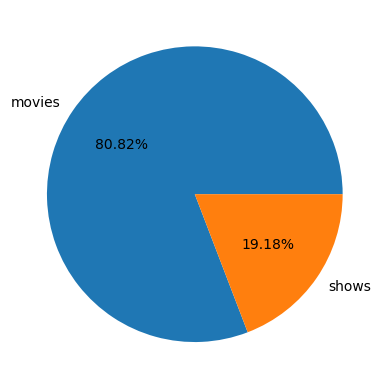

In [146]:
plt.pie(Amsv,labels=Ams,autopct='%1.2f%%')

# Amazon prime makes more movies than shows

In [59]:
Agenre_index=adata.listed_in.value_counts().index
Agenre_value=adata.listed_in.value_counts().values

In [81]:
Agenre=pd.DataFrame(Agenre_value,Agenre_index).reset_index().rename(columns={0:'count'})

In [153]:
Agenre.head(10)

,listed_in,count
0,Drama,986
1,Comedy,536
2,"Drama, Suspense",399
3,"Comedy, Drama",377
4,"Animation, Kids",356
5,Documentary,350
6,Kids,334
7,"Action, Drama",297
8,"Documentary, Special Interest",296
9,TV Shows,263


<BarContainer object of 5 artists>

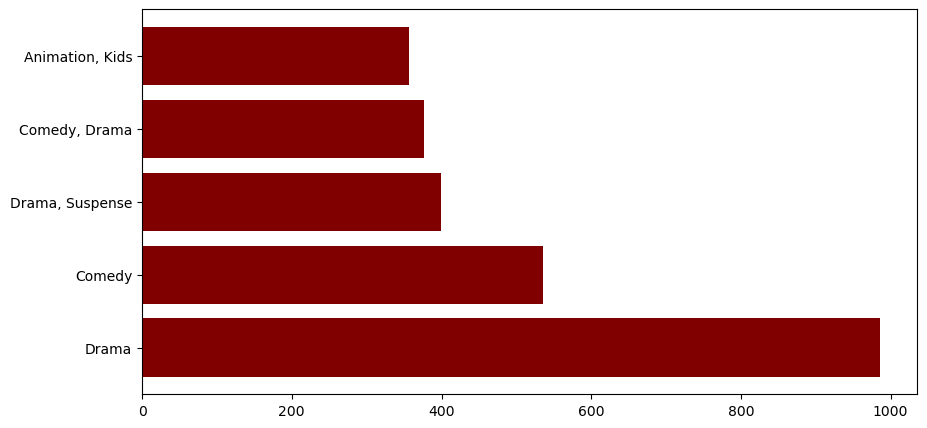

In [155]:
fig = plt.figure(figsize = (10, 5))
plt.barh(Agenre_index[0:5],Agenre_value[0:5],color='maroon')

# Amazon prefers to make content based on Drama and Comedy.

In [156]:
adata.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [181]:
list_of_Adir=[f for f in adata.director if f!='NaN']


In [190]:
Adir_index=adata.director.value_counts().index
Adir_value=adata.director.value_counts().values

In [199]:
A_director=pd.DataFrame(Adir_value,Adir_index).reset_index().rename(columns={0:'counts'})

In [200]:
A_Director

,index,director
0,113,Mark Knight
1,61,Cannis Holder
2,37,Moonbug Entertainment
3,34,Jay Chapman
4,30,Arthur van Merwijk
...,...,...
5768,1,Karyn Kusama
5769,1,K. Subash
5770,1,Robert Cuffley
5771,1,J. Sabarish


In [204]:
adata.cast.value_counts().head(1)

cast
Maggie Binkley    56
Name: count, dtype: int64

# Maggie Binkley is fround to be most acted actor in Amazom prime

In [208]:
acountry_value=adata.country.value_counts().values
acountry_index=adata.country.value_counts().index

In [221]:
A_contry=pd.DataFrame(acountry_value,acountry_index)

In [224]:
A_country.reset_index().rename(columns={0:'counts'})

,country,counts
0,United States,253
1,India,229
2,United Kingdom,28
3,Canada,16
4,"United Kingdom, United States",12
...,...,...
81,"United States, Germany, Brazil, Italy",1
82,South Africa,1
83,"Australia, United States, Germany",1
84,"Germany, Austria, United States",1


([<matplotlib.patches.Wedge at 0x237db69b350>,
 [Text(0.10262380167106898, 1.0952024266456761, 'United States'),
  Text(-0.4489744757123918, -1.0042021311263898, 'India'),
  Text(0.9703026364257658, -0.5181822013010563, 'United Kingdom'),
  Text(1.0701295347171562, -0.2546031793321579, 'Canada'),
  Text(1.097300514018965, -0.07701676397847104, 'United Kingdom, United States')],
 [Text(0.055976619093310344, 0.5973831418067324, '47.03%'),
  Text(-0.2448951685703955, -0.5477466169780307, '42.57%'),
  Text(0.5292559835049631, -0.2826448370733034, '5.20%'),
  Text(0.5837070189366306, -0.1388744614539043, '2.97%'),
  Text(0.5985275531012535, -0.042009143988256926, '2.23%')])

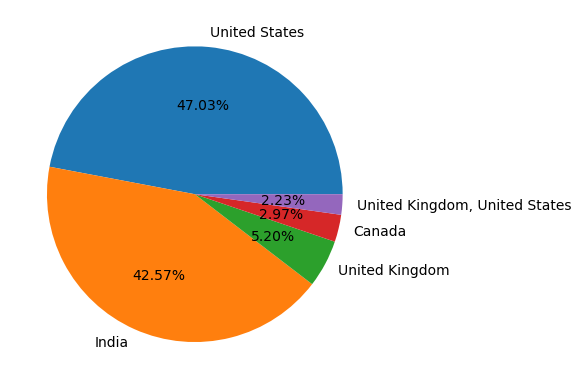

In [225]:
plt.pie(acountry_value[0:5],labels=acountry_index[0:5],autopct='%1.2f%%')

# From the above pie chart,we can confirm that India and USA has produced most no.of contents.


In [231]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [242]:
adata.release_year.value_counts().head(5)

release_year
2021    1442
2020     962
2019     929
2018     623
2017     562
Name: count, dtype: int64

# Amazon have released most no. of movies in 2021